## 빅데이터 실습

### 와인품질 등급 분석 및 예측

#### 데이터 수집

##### UC 어바인 머신러닝 연구소 데이터 다운로드

- ucimlrepo(종속성 dotdict 모듈도 함께 설치)
[데이터](https://archive.ics.uci.edu/dataset/186/wine+quality) 링크

##### statsmodels 라이브러리 분석 함수
- OLS : Ordinary Least Squares 2승 모델로 분석하는 함수
- GLM : Generalized Linear Model 일반 선형 모델로 분석하는 함수
- GLS : Generalized Least Squares 2승 일반화된 최소 승수 모델
- WLS : Weighted Least Squares 가중치를 부가한 OLS 모델

- fit() 훈련결과 내기
- predict() 예측 결과 내기

In [16]:
## 필수 라이브러리 / 모듈 사용등록
import pandas as pd
from ucimlrepo import fetch_ucirepo #온라인에서 통계 데이터를 읽어오는 함수
from scipy import stats # 과학수치모듈 내의 기술통계
from statsmodels.formula.api import ols, glm # 분석을 위한 결과를 도출해주는 함수

In [17]:
# fetch dataset 와인데이터 가져오기
wine_quality = fetch_ucirepo(id=186)

In [18]:
df_total_wine = wine_quality.data.original

In [19]:
df_total_wine.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


##### 회귀 분석

In [20]:
## 회구분석 변수로 회귀 수식 작성
RFormula = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol'

In [21]:
## 회귀분석
regr_result = ols(RFormula,data=df_total_wine).fit()
regr_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Thu, 21 Mar 2024   Prob (F-statistic):               0.00
Time:                        11:45:05   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
## 회귀분석
regr_result2 = glm(RFormula,data=df_total_wine).fit()
regr_result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                quality   No. Observations:                 6497
Model:                            GLM   Df Residuals:                     6485
Model Family:                Gaussian   Df Model:                           11
Link Function:               Identity   Scale:                         0.54071
Method:                          IRLS   Log-Likelihood:                -7215.5
Date:                Thu, 21 Mar 2024   Deviance:                       3506.5
Time:                        11:45:05   Pearson chi2:                 3.51e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.3376
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.451      79.074
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.756     -31.178
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
========================================================================================
"""

##### 도출된 회귀 분석 결과로 새로운 와인 샘플 품질 등급을 예측

In [23]:
## 와인 품질 등급 예측용 샘플데이터
df_total_wine.columns.difference(['quality','color'])

Index(['alcohol', 'chlorides', 'citric_acid', 'density', 'fixed_acidity',
       'free_sulfur_dioxide', 'pH', 'residual_sugar', 'sulphates',
       'total_sulfur_dioxide', 'volatile_acidity'],
      dtype='object')

In [24]:
## 품질 예측을 할 것이기에 quality 불필요, 와인 종류도 의미가 없다
sample1 = df_total_wine[df_total_wine.columns.difference(['quality','color'])]

In [25]:
sample1 = sample1[0:5]
sample1

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70
1,9.8,0.098,0.00,0.9968,7.8,25.0,3.20,2.6,0.68,67.0,0.88
2,9.8,0.092,0.04,0.9970,7.8,15.0,3.26,2.3,0.65,54.0,0.76
3,9.8,0.075,0.56,0.9980,11.2,17.0,3.16,1.9,0.58,60.0,0.28
4,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70


In [26]:
# OLS 모델 예측 시작
regr_result.predict(sample1)

0    4.997607
1    4.924993
2    5.034663
3    5.680333
4    4.997607
dtype: float64

- 결론 : 실제 데이터와 선형회귀로 예측한 결과(quality)가 거의 동일하다.

In [27]:
regr_result2.predict(sample1)

0    4.997607
1    4.924993
2    5.034663
3    5.680333
4    4.997607
dtype: float64

In [28]:
## 더미데이터 생성 #세번 째 값은 품질이 9등급인 데이터의 평균을 넣고 있다. #네번 재 값은 9등급 중 하나의 값을 넣고 있다
data = {'fixed_acidity':[8.5,8.1,7.5,7.1], 'volatile_acidity' : [0.8,0.5,0.3,0.26], 'citric_acid': [0.3,0.4,0.4,0.49],'residual_sugar' :[6.1,5.8,5.0,2.2],
        'chlorides':[0.05,0.04,0.027,0.032],'free_sulfur_dioxide' :[30.0,31.0,33.4,31.0],'total_sulfur_dioxide':[98.0,99.0,116.0,113.0],'density':[0.996,0.91,0.991,0.99030] ,
        'pH':[3.25,3.01,3.30,3.37], 'sulphates':[0.4,0.35,0.47,0.42],'alcohol':[9.0,0.88,12.2,12.9]}

In [29]:
## 컬럼 순서를 바꿈. sample 1번으로 예측한 데이터와 컬럼 순서를 일치 시키기 위해
sample2 = pd.DataFrame(data,columns=sample1.columns)
sample2

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.00,0.050,0.30,0.9960,8.5,30.0,3.25,6.1,0.40,98.0,0.80
1,0.88,0.040,0.40,0.9100,8.1,31.0,3.01,5.8,0.35,99.0,0.50
2,12.20,0.027,0.40,0.9910,7.5,33.4,3.30,5.0,0.47,116.0,0.30
3,12.90,0.032,0.49,0.9903,7.1,31.0,3.37,2.2,0.42,113.0,0.26


In [30]:
# 예측 시작
regr_result.predict(sample2)

0    4.811513
1    7.582129
2    6.540728
3    6.643370
dtype: float64

In [31]:
condition = df_total_wine['quality'] == 9

In [32]:
# 9등급만 와인만 예측
df_wine_top = df_total_wine[condition]

In [33]:
sample3 = df_wine_top[df_wine_top.columns.difference(['quality','color'])]
sample3

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
2373,10.4,0.035,0.45,0.99700,9.1,28.0,3.20,10.6,0.46,124.0,0.27
2419,12.4,0.021,0.29,0.98965,6.6,24.0,3.41,1.6,0.61,85.0,0.36
2426,12.5,0.031,0.36,0.99055,7.4,27.0,3.28,2.0,0.48,139.0,0.24
2475,12.7,0.018,0.34,0.98980,6.9,57.0,3.28,4.2,0.36,119.0,0.36
3204,12.9,0.032,0.49,0.99030,7.1,31.0,3.37,2.2,0.42,113.0,0.26


In [34]:
regr_result.predict(sample3)

2373    6.009279
2419    6.571296
2426    6.493871
2475    6.636157
3204    6.643370
dtype: float64

##### 결과 시각화

In [35]:
## 시각화 라이브러리 사용등록
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [36]:
sns.set_style('darkgrid')

In [37]:
## 레드 와인과 화이트 와인의 각각 퀄리티 뽑아내기
condition1 = df_total_wine['color'] == 'red'
condition2 = df_total_wine['color'] == 'white'

red_wine_quality = df_total_wine[condition1]['quality']

white_wine_quality = df_total_wine[condition2]['quality']

In [38]:
from matplotlib import rcParams,font_manager,rc
font_path = 'C:/Windows/Fonts/NanumGothicCoding.ttf' #나눔고딕코딩체
font_name = font_manager.FontProperties(fname=font_path).get_name() # 실제 설치된 폰트 이름 조회
rc('font',family=font_name) # 한글깨짐 현상 해결!!
rcParams['axes.unicode_minus'] = False # 한글 사용시 마이너스가 표시가 깨지는 걸 방지

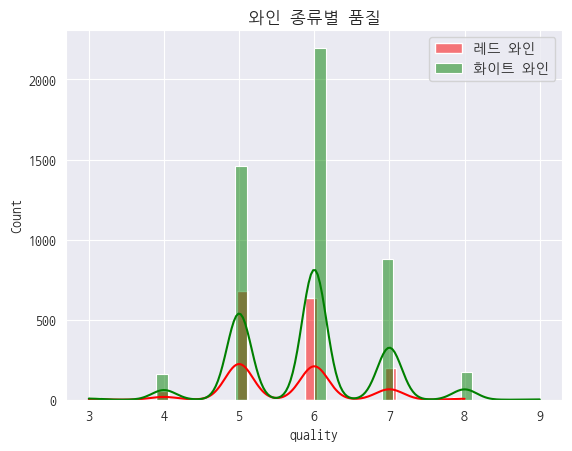

In [39]:
# distplot() 은 seaborn v0.14.0에서 제거될 함수, 대신 histplot() 사용할 것
sns.histplot(red_wine_quality,kde=True,color='red',label='레드 와인',binwidth=0.15)
sns.histplot(white_wine_quality,kde=True,label='화이트 와인',color='green',binwidth=0.15)

plt.title('와인 종류별 품질')
plt.legend()
plt.show()

In [40]:
others = list(set(df_total_wine.columns).difference({'quality','fixed_acidity'}))


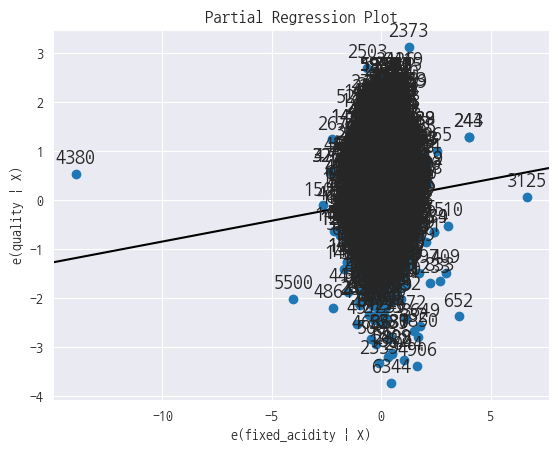

In [41]:
# fixed_acidity(고정산)에 대한 quality(품질)의 상관 관계를 선형회귀분석으로 시각화
p, resids = sm.graphics.plot_partregress(exog_i='fixed_acidity',endog='quality',exog_others=others,data=df_total_wine,obs_labels=True,ret_coords=True)

plt.show()

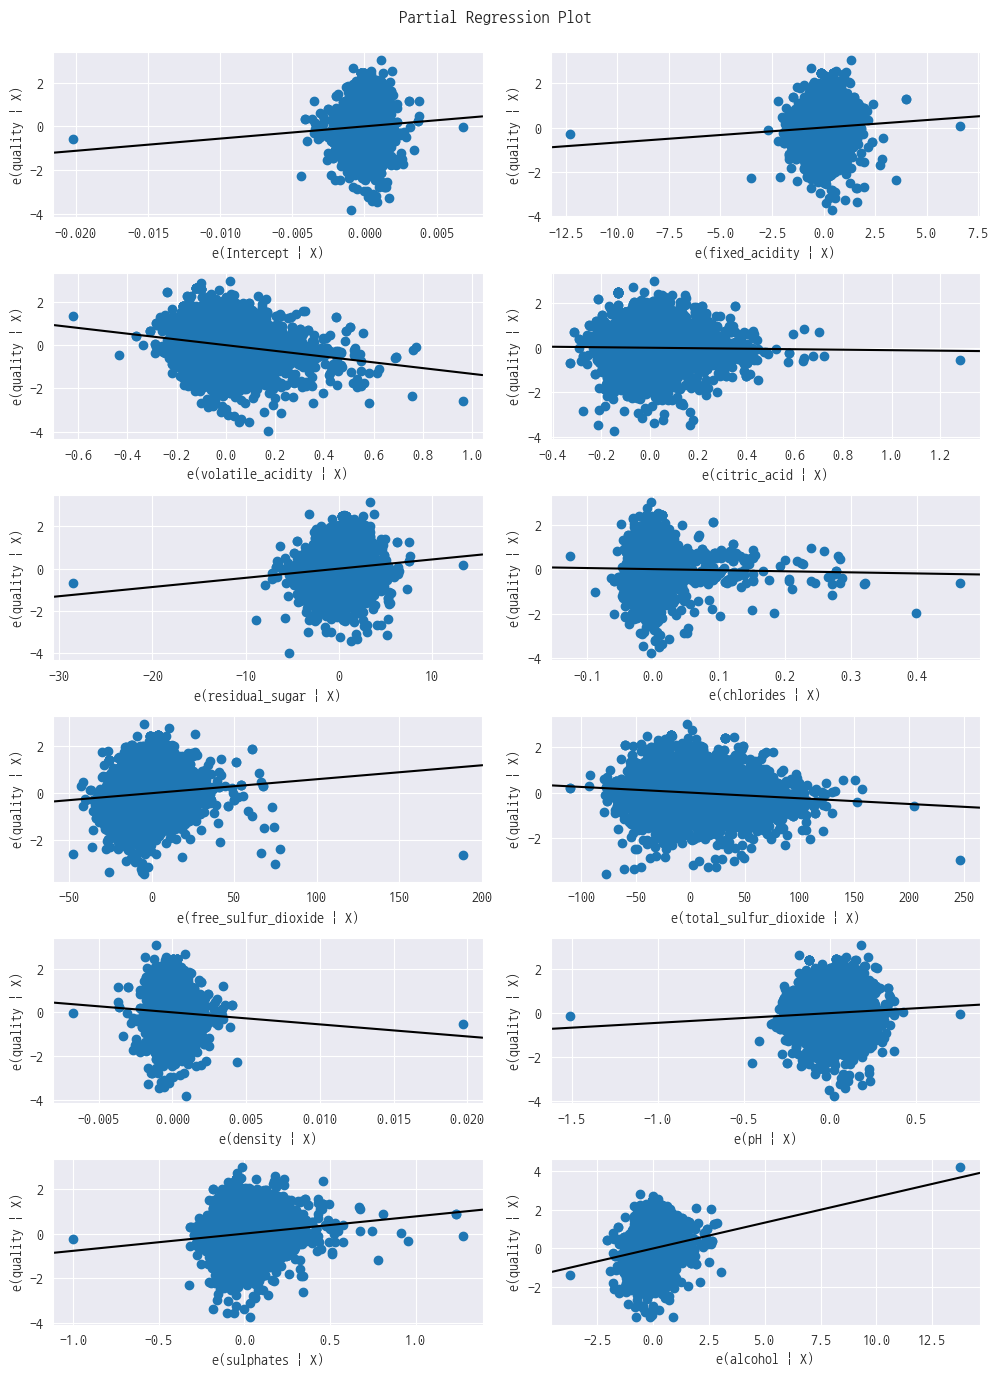

In [42]:
## 선형회귀 결과로 시각화
fig = plt.figure(figsize=(10,14))
sm.graphics.plot_partregress_grid(regr_result,fig=fig)
plt.show()

In [46]:
df_total_wine[['alcohol','quality']]

,alcohol,quality
0,9.4,5
1,9.8,5
2,9.8,5
3,9.8,6
4,9.4,5
...,...,...
6492,11.2,6
6493,9.6,5
6494,9.4,6
6495,12.8,7
